## 00. Imports:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from sklearn.metrics import accuracy_score



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/majamielke/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/majamielke/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/majamielke/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/majamielke/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/majamielke/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/majamielke/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/majamielke/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/majamielke/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

## 01. Loading MEFAR PreProcessed DataSet and Setting X & Y Variables:

In [ ]:
MEFAR_MID = pd.read_csv('../raw_data//MEFAR_preprocessed/MEFAR_MID.csv')


In [ ]:
MEFAR_MID.shape

(923298, 18)

In [ ]:
X_all = MEFAR_MID.drop(columns=['class'])
y_all = MEFAR_MID['class']

In [ ]:
X_EEG = X_all.drop(['BVP', 'EDA', 'TEMP', 'AccX', 'AccY', 'AccZ', 'HR'], axis=1)

In [ ]:
X_EEG.shape, y_all.shape

((923298, 10), (923298,))

In [ ]:
X_all.shape, y_all.shape

((923298, 17), (923298,))

In [ ]:
X_all.head()

,BVP,EDA,TEMP,AccX,AccY,AccZ,HR,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation
0,-0.150426,0.026215,0.778824,-0.325490,0.019608,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
1,-0.145506,0.026215,0.778824,-0.333333,-0.003922,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
2,-0.135576,0.026215,0.778824,-0.349020,-0.035294,0.333333,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
3,-0.121047,0.026215,0.778824,-0.380392,-0.027451,0.356863,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
4,-0.103369,0.026215,0.778824,-0.411765,-0.011765,0.411765,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909


In [ ]:
X_EEG.head()

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation
0,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
1,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
2,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
3,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
4,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909


## 02. Creating Time-Window Data & Train-Test Split:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sampling_rate = 32
window_seconds = 10  # 10 seconds of data = 320 rows
window_size = sampling_rate * window_seconds
stride = int(window_size * 0.5)  # 50% overlap = 5s shift


In [ ]:
session_map = pd.read_csv('../raw_data/MEFAR_preprocessed/Session_Map.csv')
session_map.head()

,session_id,start_index,end_index
0,sub01_morning,0,1777
1,sub01_evening,1777,3679
2,sub02_morning,3679,5635
3,sub02_evening,5635,7593
4,sub03_morning,7593,9550


In [ ]:
# Define sampling and windowing parameters
sampling_rate = 32                     # MEFAR data has 32 samples per second
window_seconds = 10                    # Each window covers 10 seconds
window_size = sampling_rate * window_seconds  # 320 samples per window
stride = int(window_size * 0.5)        # 50% overlap between windows → 5s step

# Lists to store results
X_windows, y_windows, session_ids = [], [], []

# Loop through each session defined in session_map
for _, row in session_map.iterrows():
    session_id = row['session_id']               # Session identifier
    start = int(row['start_index'])              # Start index of session in full dataset
    end = int(row['end_index'])                  # End index of session

    # Extract the features and labels for this session
    X_session = X_all.iloc[start:end].values         # Shape: (session_length, num_features)
    y_session = y_all.iloc[start:end].values         # Shape: (session_length,)

    # Slide window through session using defined stride
    for i in range(0, len(X_session) - window_size + 1, stride):
        # Extract the feature window and corresponding label window
        window = X_session[i:i + window_size]          # Shape: (320, num_features)
        label_window = y_session[i:i + window_size]    # Shape: (320,)

        # ✅ Assign label based on majority vote in the 10s window
        # If more than 50% of samples in the window are "1" (fatigued), label the window as fatigued
        majority_label = int(label_window.mean() > 0.5)

        # Store results
        X_windows.append(window)
        y_windows.append(majority_label)
        session_ids.append(session_id)

# Convert lists to numpy arrays for modeling
X_windows = np.array(X_windows)       # Shape: (num_windows, 320, num_features)
y_windows = np.array(y_windows)       # Shape: (num_windows,)
session_ids = np.array(session_ids)   # Shape: (num_windows,)

# # Optional: Normalize each window individually using min-max scaling
# # This ensures each feature in each window is scaled to [0, 1] based on its own min/max
# X_norm = np.array([MinMaxScaler().fit_transform(window) for window in X_windows])

In [ ]:
X_all.shape[1]

17

In [ ]:
X_windows.shape

(501, 320, 17)

In [ ]:
# Create train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_windows, y_windows,
    test_size=0.2,
    random_state=42,
    stratify=y_windows  # ensures same class distribution in train and test
)

In [ ]:
X_train.shape

(400, 320, 17)

In [ ]:
X_test.shape

(101, 320, 17)

In [ ]:
y_train.shape

(400,)

## 03. LSTM (Long Short-Term Memory) - ALL FEATURES:

In [ ]:
# MODEL VERSION 001
model = Sequential([
    # LSTM layer with 64 units, processing sequences of shape (320 timesteps, 17 features)
    LSTM(64, input_shape=(320, 17), return_sequences=False),
    # Dropout to prevent overfitting by randomly deactivating 30% of units
    Dropout(0.3),
    # Dense hidden layer with 32 neurons and ReLU activation
    Dense(32, activation='relu'),
    Dropout(0.3),
    # Another dropout layer for regularization
    Dense(1, activation='sigmoid') # 1 neuron and sigmoid activation function for binary classification.
])

# Compile model & Fit:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/10


/Users/timoturnley/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6946 - loss: 0.6291 - val_accuracy: 0.8125 - val_loss: 0.3760
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7938 - loss: 0.3849 - val_accuracy: 0.9625 - val_loss: 0.1544
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9966 - loss: 0.1773 - val_accuracy: 0.9875 - val_loss: 0.0722
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9672 - loss: 0.1391 - val_accuracy: 0.9500 - val_loss: 0.1178
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9554 - loss: 0.1314 - val_accuracy: 0.9875 - val_loss: 0.0495
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9747 - loss: 0.0842 - val_accuracy: 0.9875 - val_loss: 0.0499
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9827 - loss: 0.0860 - val_accuracy: 0.9875 - val_loss: 0.0409
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9810 - loss: 0.0593 - val_accuracy: 0.9875 - val_loss: 0.

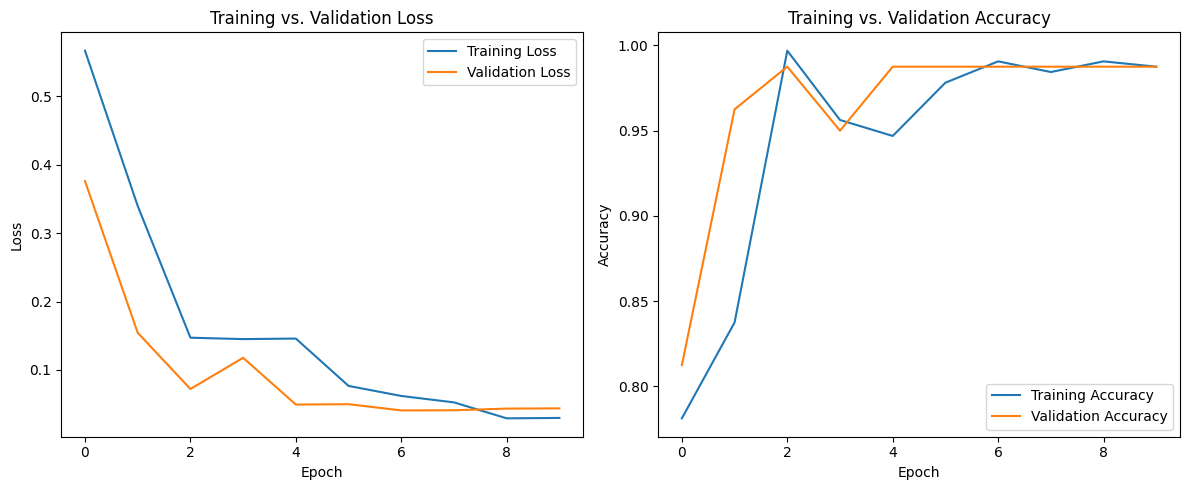

In [ ]:
# Extract training history
history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

* **Left-Loss Curve** - training and validation loss decrease steadily this is a good sign. 
* **Right-Accuracy Curve** - Both training and validation accuracy quickly climb to 99%. 
* *To Improve* - Add Early stopping

In [ ]:
# MODEL VERSION 002
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


model2 = Sequential([
    # LSTM layer with 32 units, processing sequences of shape (320 timesteps, 17 features)
    LSTM(32, input_shape=(320, 17), return_sequences=False),
    # Dropout to prevent overfitting by randomly deactivating 30% of units
    Dropout(0.3),
    # Dense hidden layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),
    Dropout(0.3),
    # Another dropout layer for regularization
    Dense(1, activation='sigmoid') # 1 neuron and sigmoid activation function for binary classification.
])

# Compile model & Fit:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2,callbacks=[early_stop])


Epoch 1/10
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9972 - loss: 0.0212

/Users/timoturnley/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9865 - loss: 0.0579 - val_accuracy: 0.8875 - val_loss: 0.1844
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9063 - loss: 0.1839 - val_accuracy: 1.0000 - val_loss: 0.0334
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9966 - loss: 0.0329 - val_accuracy: 1.0000 - val_loss: 0.0209
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9966 - loss: 0.0278 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9984 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9966 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 6.9615e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 5.1856e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_

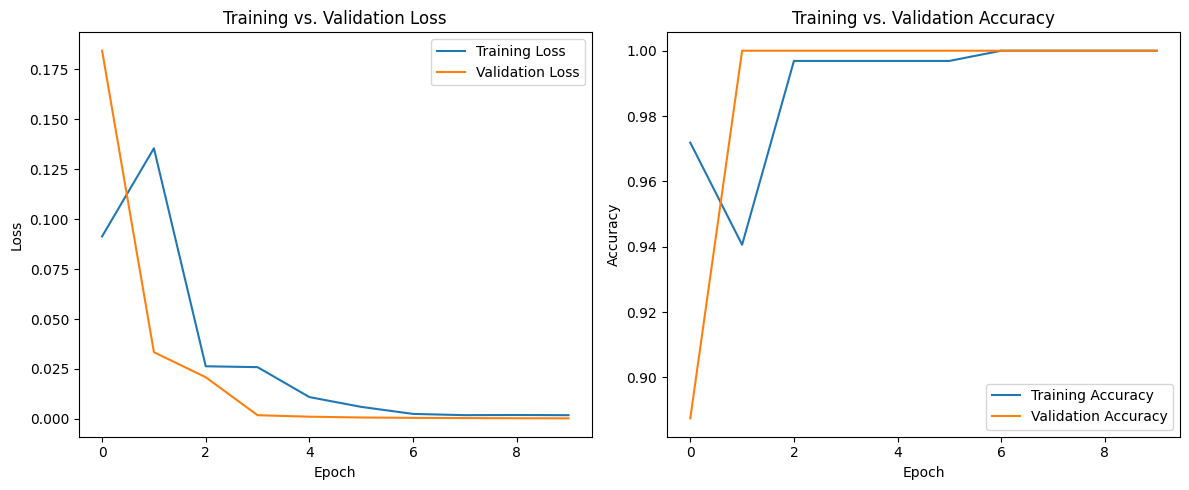

In [ ]:
# Extract training history
history_dict2 = history2.history

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_dict2['loss'], label='Training Loss')
plt.plot(history_dict2['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict2['accuracy'], label='Training Accuracy')
plt.plot(history_dict2['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

* **Training-Validation Accuracy Right** - both curves rapidly reach 100% accuracy within 2-3 epochs
* **Training-Validation Loss Left** - Both losses drop sharply and stabilize near zero. 

In [ ]:
# Evaluation
y_pred2 = (model2.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        26

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



## 04. 1D CNN Model (All Features):

In [ ]:
# MODEL VERSION 001
model_CNN = Sequential([
    # Conv layer to detect short-term patterns (5 time steps)
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(320, 17)),
    MaxPooling1D(pool_size=2),  # Downsample

    # Second Conv layer to go deeper
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    # Global pooling to reduce each feature map to a single number
    GlobalAveragePooling1D(),

    # Fully connected layer
    Dense(32, activation='relu'),
    Dropout(0.4),

    # Output
    Dense(1, activation='sigmoid')  # Binary classification
])

model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/timoturnley/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_CNN = model_CNN.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8445 - loss: 0.5316 - val_accuracy: 0.9375 - val_loss: 0.2171
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9424 - loss: 0.2236 - val_accuracy: 1.0000 - val_loss: 0.0544
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9942 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9966 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss

In [ ]:
# Predict on test set
y_pred = (model_CNN.predict(X_test) > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        26

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

[[75  0]
 [ 0 26]]


In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[75  0]
 [ 0 26]]


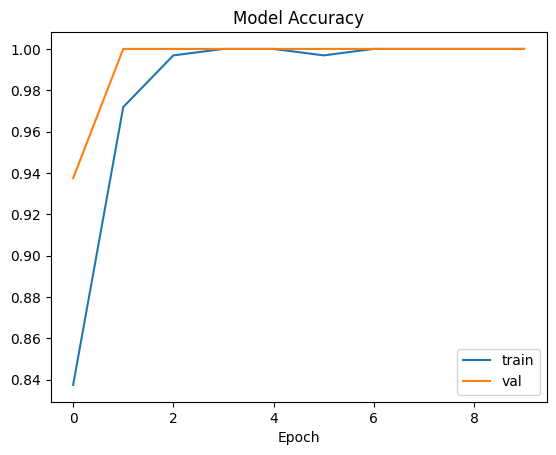

In [ ]:
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.show()

## 05. LSTM - EEG Features Only:

In [ ]:
# Define sampling and windowing parameters
sampling_rate = 32                     # MEFAR data has 32 samples per second
window_seconds = 10                    # Each window covers 10 seconds
window_size = sampling_rate * window_seconds  # 320 samples per window
stride = int(window_size * 0.5)        # 50% overlap between windows → 5s step

# Lists to store results
X_windows_EEG, y_windows_EEG, session_ids = [], [], []

# Loop through each session defined in session_map
for _, row in session_map.iterrows():
    session_id = row['session_id']               # Session identifier
    start = int(row['start_index'])              # Start index of session in full dataset
    end = int(row['end_index'])                  # End index of session

    # Extract the features and labels for this session
    X_session_EEG = X_EEG.iloc[start:end].values         # Shape: (session_length, num_features)
    y_session_EEG = y_all.iloc[start:end].values         # Shape: (session_length,)

    # Slide window through session using defined stride
    for i in range(0, len(X_session_EEG) - window_size + 1, stride):
        # Extract the feature window and corresponding label window
        window_EEG = X_session_EEG[i:i + window_size]          # Shape: (320, num_features)
        label_window_EEG = y_session_EEG[i:i + window_size]    # Shape: (320,)

        # ✅ Assign label based on majority vote in the 10s window
        # If more than 50% of samples in the window are "1" (fatigued), label the window as fatigued
        majority_label = int(label_window.mean() > 0.5)

        # Store results
        X_windows_EEG.append(window_EEG)
        y_windows_EEG.append(majority_label)
        session_ids.append(session_id)

# Convert lists to numpy arrays for modeling
X_windows_EEG = np.array(X_windows_EEG)       # Shape: (num_windows, 320, num_features)
y_windows_EEG = np.array(y_windows_EEG)       # Shape: (num_windows,)
session_ids = np.array(session_ids)   # Shape: (num_windows,)

In [ ]:
X_windows_EEG.shape, y_windows_EEG.shape

((501, 320, 10), (501,))

In [ ]:
# Create train-test split (e.g., 80% train, 20% test)
X_train_EEG, X_test_EEG, y_train_EEG, y_test_EEG = train_test_split(
    X_windows_EEG, y_windows_EEG,
    test_size=0.2,
    random_state=42,
    stratify=y_windows_EEG  # ensures same class distribution in train and test
)

In [ ]:
# MODEL VERSION 001
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


model_EEG = Sequential([
    # LSTM layer with 32 units, processing sequences of shape (320 timesteps, 17 features)
    LSTM(32, input_shape=(320, 10), return_sequences=False),
    # Dropout to prevent overfitting by randomly deactivating 30% of units
    Dropout(0.3),
    # Dense hidden layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),
    Dropout(0.3),
    # Another dropout layer for regularization
    Dense(1, activation='sigmoid') # 1 neuron and sigmoid activation function for binary classification.
])

# Compile model & Fit:
model_EEG.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_EEG = model_EEG.fit(X_train_EEG, y_train_EEG, epochs=10, batch_size=32, validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7374 - loss: 0.6255 - val_accuracy: 1.0000 - val_loss: 0.4534
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9764 - loss: 0.4305 - val_accuracy: 1.0000 - val_loss: 0.2248
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9893 - loss: 0.2328 - val_accuracy: 1.0000 - val_loss: 0.0670
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.1096 - val_accuracy: 1.0000 - val_loss: 0.0289
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9991 - loss: 0.0732 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9984 - loss: 0.0515 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9979 - loss: 0.0413 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0358 - val_accuracy: 1.0000 - v

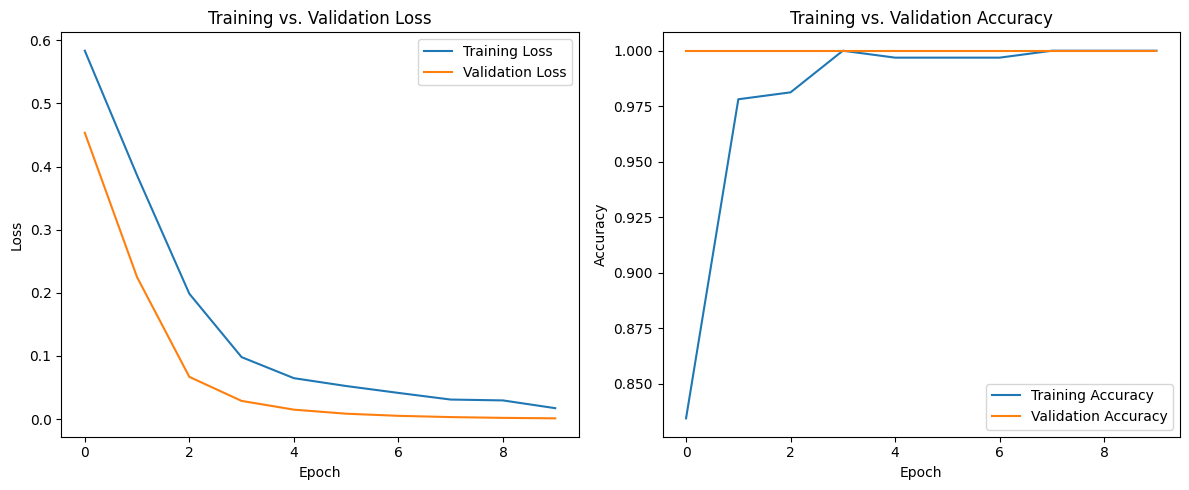

In [ ]:
# Extract training history
history_dict_EEG = history_EEG.history

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_dict_EEG['loss'], label='Training Loss')
plt.plot(history_dict_EEG['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict_EEG['accuracy'], label='Training Accuracy')
plt.plot(history_dict_EEG['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 06. General ML Models (Random Forest):

In [ ]:
MEFAR_MID.head()

,BVP,EDA,TEMP,AccX,AccY,AccZ,HR,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation,class
0,-0.150426,0.026215,0.778824,-0.325490,0.019608,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
1,-0.145506,0.026215,0.778824,-0.333333,-0.003922,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
2,-0.135576,0.026215,0.778824,-0.349020,-0.035294,0.333333,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
3,-0.121047,0.026215,0.778824,-0.380392,-0.027451,0.356863,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
4,-0.103369,0.026215,0.778824,-0.411765,-0.011765,0.411765,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0


In [ ]:
X_EEG.head()

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation
0,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
1,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
2,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
3,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
4,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909


In [ ]:
# Train/Test split sample set dataframe containing EEG features:
X_train, X_test, y_train, y_test = train_test_split(X_EEG,y_all,test_size=0.2,random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
y_pred_RF = clf.predict(X_test)
y_pred_RF

array([1., 1., 0., ..., 0., 0., 0.])

In [76]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83     92491
         1.0       0.89      0.71      0.79     92169

    accuracy                           0.81    184660
   macro avg       0.82      0.81      0.81    184660
weighted avg       0.82      0.81      0.81    184660



In [75]:
("Accuracy:", accuracy_score(y_test, y_pred_RF))

('Accuracy:', 0.8101862883136576)

* We have slight class imbalance and it will help to set the class weight to 'balanced' 

In [77]:
clf2 = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1, random_state=42, class_weight='balanced')
clf2.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
y_pred_RF2 = clf2.predict(X_test)
y_pred_RF2

array([1., 1., 1., ..., 0., 0., 0.])

In [79]:
print(classification_report(y_test,y_pred_RF2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     92491
         1.0       1.00      1.00      1.00     92169

    accuracy                           1.00    184660
   macro avg       1.00      1.00      1.00    184660
weighted avg       1.00      1.00      1.00    184660



In [81]:
("Accuracy:", accuracy_score(y_test, y_pred_RF2))

('Accuracy:', 0.9999025235568071)

In [82]:
MEFAR_MID.head()

,BVP,EDA,TEMP,AccX,AccY,AccZ,HR,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation,class
0,-0.150426,0.026215,0.778824,-0.325490,0.019608,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
1,-0.145506,0.026215,0.778824,-0.333333,-0.003922,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
2,-0.135576,0.026215,0.778824,-0.349020,-0.035294,0.333333,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
3,-0.121047,0.026215,0.778824,-0.380392,-0.027451,0.356863,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
4,-0.103369,0.026215,0.778824,-0.411765,-0.011765,0.411765,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0


## 07. General ML Models (XGBoost):

*XGBoost Extreme Gradient Boosting - ensemble tree-based method, builds tree's sequentially, each one learning from the errors of the previous one. Each tree corrects its predecessor.*

In [93]:
# Train-test split
X_train_XGBoost, X_test_XGBoost, y_train_XGBoost, y_test_XGBoost = train_test_split(X_EEG, y_all, test_size=0.2, random_state=42)

# XGBoost model
model_XGB = XGBClassifier(n_estimators=100, max_depth=6, use_label_encoder=False, eval_metric='logloss')
model_XGB.fit(X_train_XGBoost, y_train_XGBoost)

# Evaluation
y_pred_XGB = model_XGB.predict(X_test_XGBoost)
print(classification_report(y_test_XGBoost, y_pred_XGB))

/Users/timoturnley/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:18:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     92491
         1.0       0.86      0.83      0.85     92169

    accuracy                           0.85    184660
   macro avg       0.85      0.85      0.85    184660
weighted avg       0.85      0.85      0.85    184660



* The model is well balanced across both classes. 
* Results are generalizable and indicate the EEG features are informative. 


In [94]:
# Improving model performance.
xgb_model = XGBClassifier(
    n_estimators=100,            # Number of trees (boosting rounds). More trees can increase performance but risk overfitting.
    max_depth=6,                 # Maximum depth of each tree. Controls model complexity. Deeper trees can capture more patterns but may overfit.
    learning_rate=0.1,           # Shrinks the contribution of each tree. Lower values make learning slower but can yield better generalization.
    subsample=0.8,               # Fraction of training instances used per tree. Helps prevent overfitting by adding randomness.
    colsample_bytree=0.8,        # Fraction of features used per tree. Reduces correlation between trees and improves generalization.
    use_label_encoder=False,     # Disables legacy label encoder, recommended in recent versions of XGBoost (avoids warning).
    eval_metric='logloss',       # Evaluation metric for binary classification. 'logloss' is appropriate for probabilistic outputs.
    random_state=42              # Ensures reproducibility of results by fixing the random seed.
)

In [95]:
# fit the updated XGBoost model
xgb_model.fit(X_train_XGBoost, y_train_XGBoost)

# Evaluation
y_pred_XGB2 = xgb_model.predict(X_test_XGBoost)
print(classification_report(y_test_XGBoost, y_pred_XGB2))

/Users/timoturnley/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:20:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77     92491
         1.0       0.78      0.72      0.75     92169

    accuracy                           0.76    184660
   macro avg       0.76      0.76      0.76    184660
weighted avg       0.76      0.76      0.76    184660

